In [1]:
import torch


In [2]:
x=torch.rand(5,3)
print(x)

tensor([[0.9366, 0.7669, 0.6570],
        [0.4494, 0.1502, 0.0319],
        [0.2576, 0.2118, 0.5206],
        [0.6644, 0.4874, 0.9762],
        [0.2009, 0.2827, 0.3854]])


In [14]:
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.data import *
from fastai.metrics import error_rate
from fastai.data.external import *
from fastai.data.transforms import *

In [15]:
path = untar_data(URLs.PETS); path

Path('C:/Users/shwethavure/.fastai/data/oxford-iiit-pet')

In [16]:
path.ls()

(#3) [Path('C:/Users/shwethavure/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/shwethavure/.fastai/data/oxford-iiit-pet/images'),Path('C:/Users/shwethavure/.fastai/data/oxford-iiit-pet/models')]

In [100]:
batch_size=1

In [101]:
files = get_image_files(path/"images")

In [102]:
len(files)

30

In [103]:
files[0].name

'Cat_1.jpg'

In [104]:
np.random.seed(2)
pat = r'^(.*)_\d+.jpg'

In [105]:
dls = ImageDataLoaders.from_name_re(path, files, pat,
                                   item_tfms = Resize(460),
                                   batch_size=batch_size,
                                   num_workers=0)

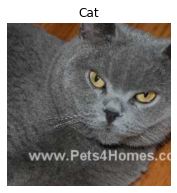

In [106]:
dls.show_batch()

In [107]:
dls = ImageDataLoaders.from_name_re(path, files, pat,
                                   item_tfms = Resize(460),
                                   batch_tfms=aug_transforms(size=30),
                                   num_workers=0)

In [108]:
learn = cnn_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=error_rate)

In [109]:
learn.fine_tune(4,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,nan,0.364530,0.166667,00:00


epoch,train_loss,valid_loss,error_rate,time
0,nan,0.364530,0.166667,00:00
1,nan,0.364530,0.166667,00:00
2,nan,0.364530,0.166667,00:00
3,nan,0.364530,0.166667,00:00


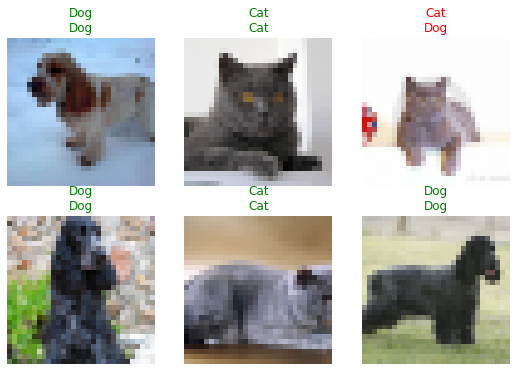

In [110]:
learn.show_results()

In [111]:
interp = Interpretation.from_learner(learn)

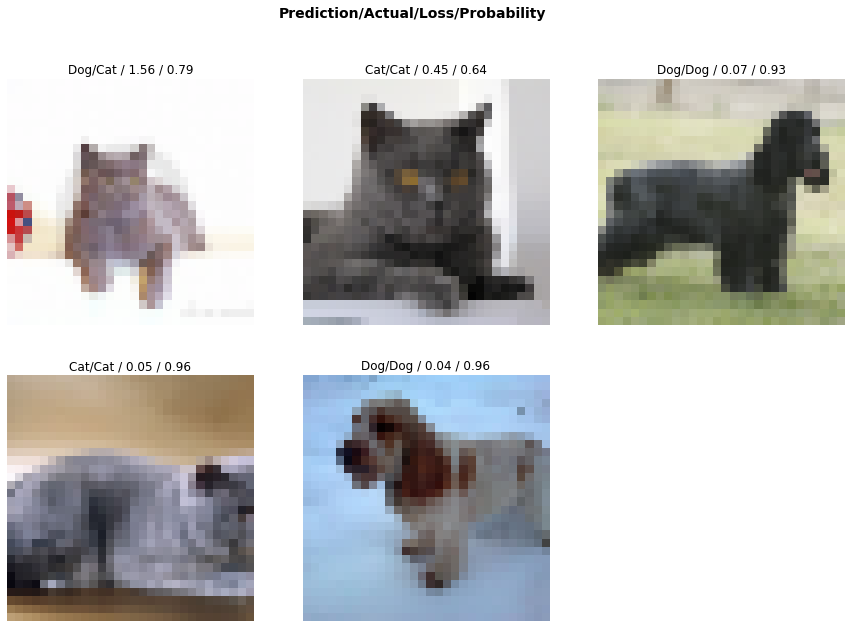

In [112]:
interp.plot_top_losses(5, figsize=(15,10))

In [113]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  